<a href="https://colab.research.google.com/github/dyjdlopez/ie-trends-data-analytics/blob/main/IE_Trends_Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation
In data preparation there are several activities that we need to perform, namely: Data Cleaning and Data Transformation. We will discuss the concepts of these activities and how do we do them using Pandas. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Cleaning
Data cleaning is the process of fixing or erroneous, corrupted, misformatted, duplicate, or incomplete data within a dataset.

In [ ]:
naia_df = pd.read_excel("NAIA Daily 2017.xlsx")
naia_df

In [22]:
### Dropping Rows
naia_df = naia_df.drop(index=0)
## original_file = file operation

In [ ]:
naia_df

In [23]:
### NaN Values
naia_df.isna().sum()

YEAR               0
MONTH              0
DAY                0
RAINFALL           0
TMAX              11
TMIN               8
TMEAN             45
WIND SPEED         0
WIND DIRECTION     0
dtype: int64

In [ ]:
## Exploring the data
plt.figure(figsize=(20,2))
naia_df['TMEAN'].plot()

In [ ]:
### Converting Data Types
naia_df.astype(float)

In [ ]:
### Check datatypes
naia_df.dtypes

In [ ]:
"""
Cleaning Rules:
T - 0.01
"""
### Fill in the T
naia_df['RAINFALL'] = naia_df['RAINFALL'].replace({"T":0.01})
naia_df

In [28]:
### Converting Data Types Again!
naia_df = naia_df.astype(float)

In [29]:
### Check datatypes
naia_df.dtypes

YEAR              float64
MONTH             float64
DAY               float64
RAINFALL          float64
TMAX              float64
TMIN              float64
TMEAN             float64
WIND SPEED        float64
WIND DIRECTION    float64
dtype: object

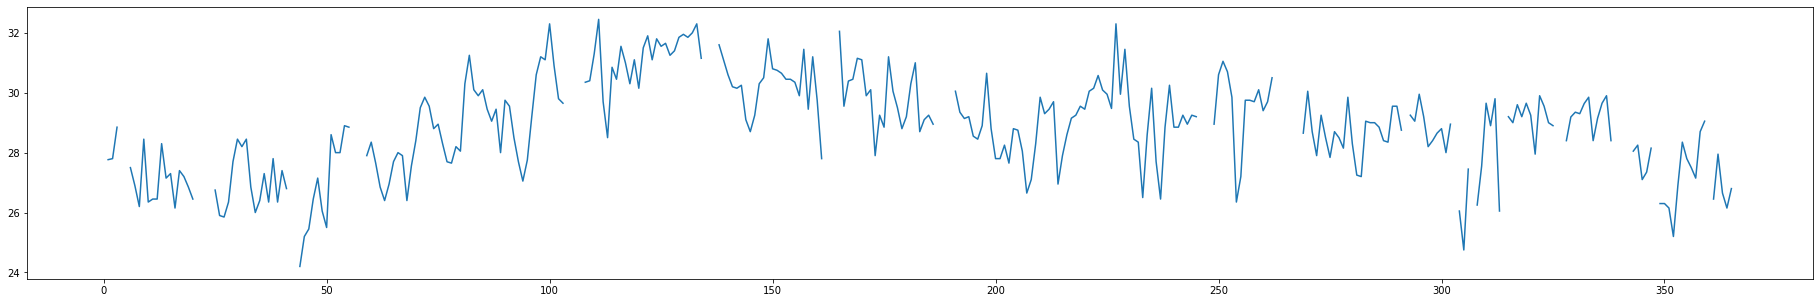

In [33]:
## Check the data again
plt.figure(figsize=(32,5))
naia_df['TMEAN'].plot()

In [35]:
## Connect the dots
naia_df['TMEAN'] = naia_df['TMEAN'].interpolate()
naia_df['TMIN'] = naia_df['TMIN'].interpolate()
naia_df['TMAX'] = naia_df['TMAX'].interpolate()

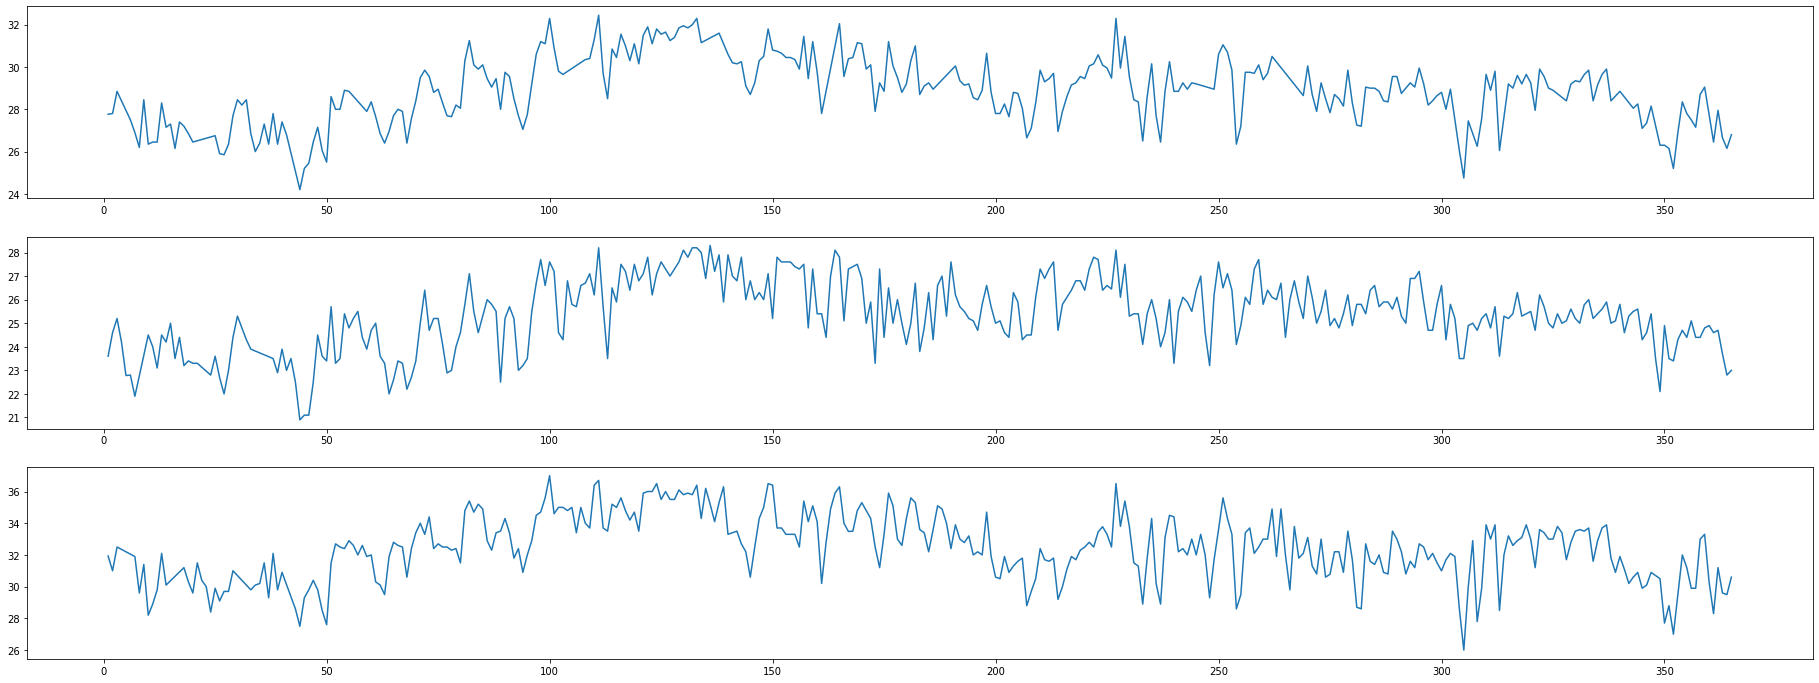

In [43]:
## Check the data again
plt.figure(figsize=(32,12))
plt.subplot(311)
naia_df['TMEAN'].plot()
plt.subplot(312)
naia_df['TMIN'].plot()
plt.subplot(313)
naia_df['TMAX'].plot()

$$T_{K} = T_{C}+273.15$$

In [41]:
### Applying a conversion
def celsius_to_kelvin(temp):
  K = temp + 273.15
  return K
celsius_to_kelvin(32)

305.15

In [ ]:
naia_temps = naia_df[['TMIN','TMAX','TMEAN']]
naia_df[['TMIN','TMAX','TMEAN']] = celsius_to_kelvin(naia_temps)
naia_df

In [49]:
naia_df

,YEAR,MONTH,DAY,RAINFALL,TMAX,TMIN,TMEAN,WIND SPEED,WIND DIRECTION
1,2017.0,1.0,1.0,0.00,305.081,296.75,300.9155,3.0,80.0
2,2017.0,1.0,2.0,0.00,304.150,297.75,300.9500,2.0,70.0
3,2017.0,1.0,3.0,0.00,305.650,298.35,302.0000,3.0,80.0
4,2017.0,1.0,4.0,0.01,305.500,297.35,301.5500,2.0,100.0
5,2017.0,1.0,5.0,0.45,305.350,295.93,301.1000,2.0,110.0
...,...,...,...,...,...,...,...,...,...
361,2017.0,12.0,27.0,1.50,301.450,297.75,299.6000,2.0,70.0
362,2017.0,12.0,28.0,0.00,304.350,297.85,301.1000,3.0,70.0
363,2017.0,12.0,29.0,0.00,302.750,296.85,299.8000,3.0,70.0
364,2017.0,12.0,30.0,0.00,302.650,295.95,299.3000,3.0,70.0


In [ ]:
### Make Dates
naia_df[["YEAR","MONTH","DAY"]] = naia_df[["YEAR","MONTH","DAY"]].astype(int).astype(str)
naia_df['DATE'] = naia_df[["MONTH","DAY","YEAR"]].agg('/'.join,axis=1)
## MM/DD/YYYY
naia_df

In [58]:
naia_df = naia_df.drop(labels=["MONTH","DAY","YEAR"],axis=1)

In [ ]:
naia_df

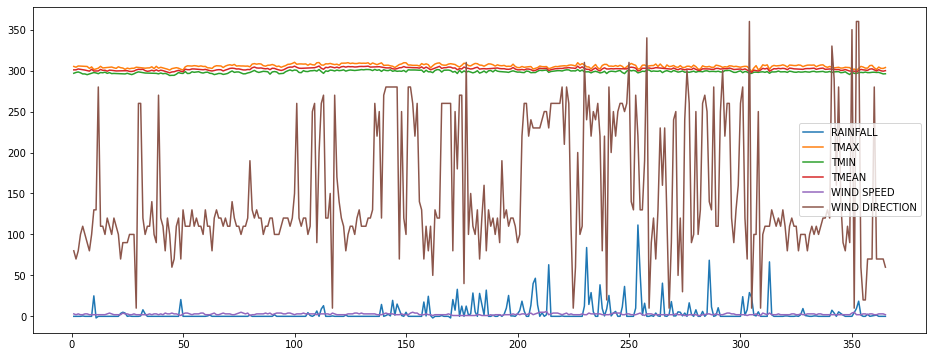

In [61]:
X = naia_df.drop(labels=["DATE"], axis=1)
X.plot(figsize=(16,6))
plt.savefig("naia-weather.jpg", dpi=300)

### Normalization 
Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

$$X' = \frac{X-X_{min}}{X_{max} - X_{min}}$$

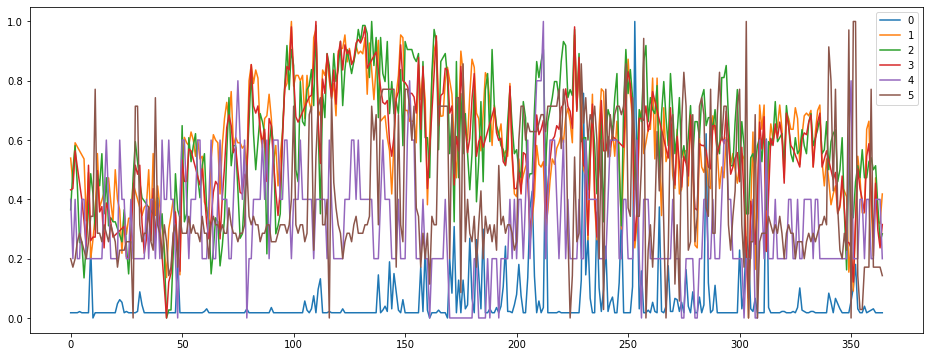

In [62]:
from sklearn.preprocessing import MinMaxScaler

## Set the scaler by fitting the dataset
norm_scaler = MinMaxScaler() #Initialize
norm = norm_scaler.fit(X) 
## Transform the target dataset
X_norm = norm.transform(X)
pd.DataFrame(X_norm).plot(figsize=(16,6))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


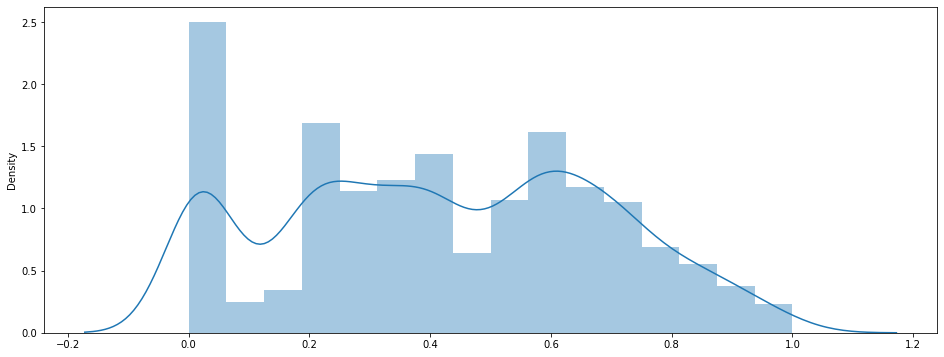

In [65]:
plt.figure(figsize=(16,6))
sns.distplot(X_norm)

### Standardization
Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

$$\frac{X-\mu}{\sigma}$$

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


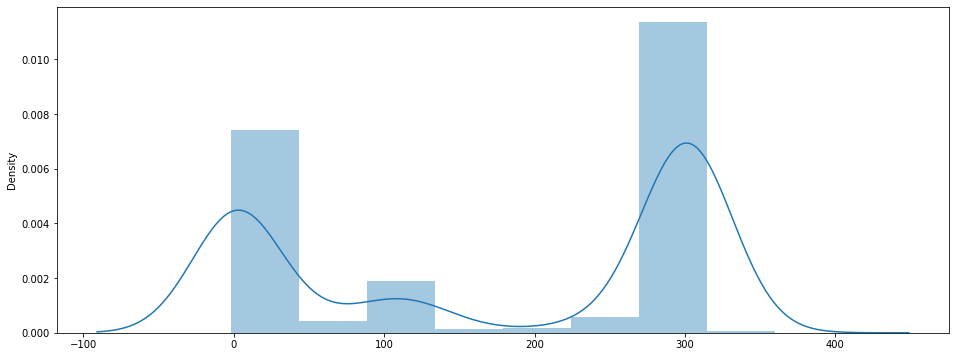

In [66]:
plt.figure(figsize=(16,6))
sns.distplot(X)

In [67]:
from sklearn.preprocessing import StandardScaler
## Set the scaler by fitting the dataset
std_scaler = StandardScaler()
standard = std_scaler.fit(X)
## Transform the target dataset
X_standard = standard.transform(X)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


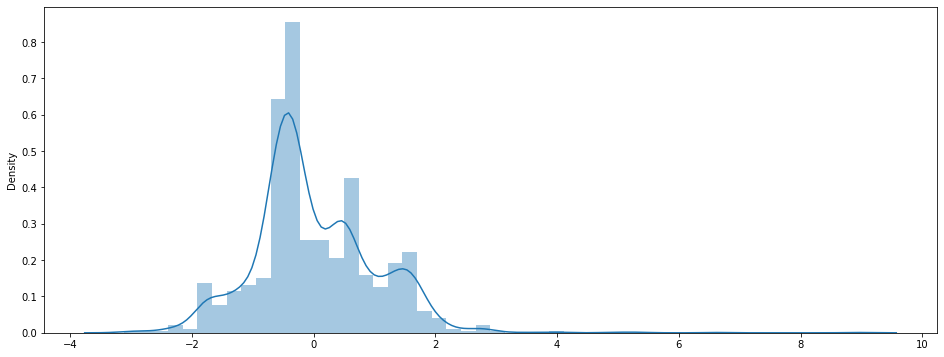

In [69]:
plt.figure(figsize=(16,6))
sns.distplot(X_standard)
plt.savefig("naia-std.jpg", dpi=300)

In [70]:
### Saving the dataset
naia_df.to_excel('naia-2017-clean.xlsx')